### Project by Samuel Nnamani a.k.a SammystTheAnalyst
#### Project Title: Text Classification (News Categorization)
##### Goal: 
1. Build a machine learning model to classify news articles into their respective categories (tech, business, etc.)
2. Create Visualizations using Matplotlib, Seaborn, and WordCloud.

### Load the dataset

In [7]:
# Import necessary libraries
import pandas as pd
import string

# Read the dataset
df = pd.read_excel("bbc-text.xlsx")

# Display the first few rows
print(df.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


### Preprocess the Text Data

##### In this case, I would need to clean the data, and on that note, I would:
1. Convert the text to lowercase.
2. Remove punctuation.
3. Remove stopwords.

In [8]:
# Define stopwords manually

custom_stopwords = set(["a","an","and","at","are","as","be","but","by","for","if","into","in","it","is","no","not","of","on","or",
                       "or","such","that","the","their","then","there","they","this","to","was","will","with","you","your"
                       ])

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()       # Convert the text to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))        # Remove punctuation
    words = text.split()      # Tokenize the text
    words = [word for word in words if word not in custom_stopwords]        # Remove stopwords
    return " ".join(words)

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess_text)

# Check cleaned text
print(df[["text", "clean_text"]])

                                                   text  \
0     tv future in the hands of viewers with home th...   
1     worldcom boss  left books alone  former worldc...   
2     tigers wary of farrell  gamble  leicester say ...   
3     yeading face newcastle in fa cup premiership s...   
4     ocean s twelve raids box office ocean s twelve...   
...                                                 ...   
2220  cars pull down us retail figures us retail sal...   
2221  kilroy unveils immigration policy ex-chatshow ...   
2222  rem announce new glasgow concert us band rem h...   
2223  how political squabbles snowball it s become c...   
2224  souness delight at euro progress boss graeme s...   

                                             clean_text  
0     tv future hands viewers home theatre systems p...  
1     worldcom boss left books alone former worldcom...  
2     tigers wary farrell gamble leicester say rushe...  
3     yeading face newcastle fa cup premiership side...  
4

### Data Visualization
#### I am going to be visualizing the data using WordCloud, Matplotlib and Seaborn

Under this aspect, I will be visualizing:
1. Distribution of News Categories.
2. Most Common Words in the Articles.
3. Percentage of News Categories.
4. Length of Articles per Category.
5. Top Words per Category

C:\Users\HOME\AppData\Local\Temp\ipykernel_2980\2525041615.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="husl")


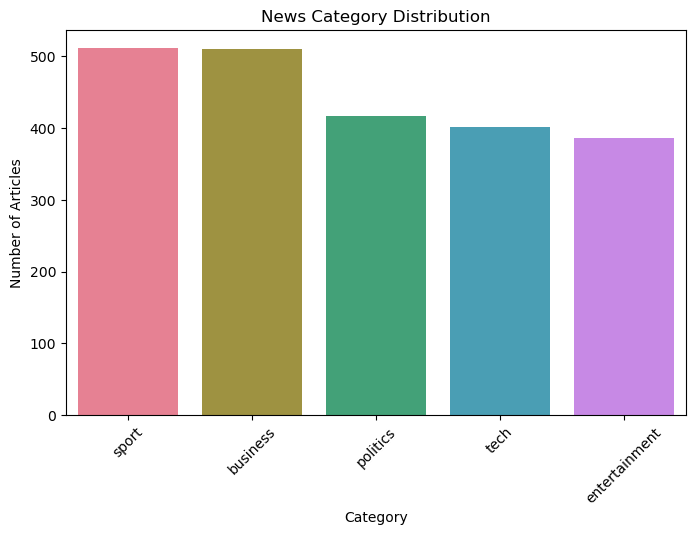

In [9]:
# 1. Distribution of News Categories
# Goal: To know how many articles exist per category

import matplotlib.pyplot as plt
import seaborn as sns

# Count articles per category
category_counts = df["category"].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="husl")
plt.title("News Category Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)


# Save the chart
plt.savefig("Distribution of News Categories", dpi=300, bbox_inches="tight")
plt.show()

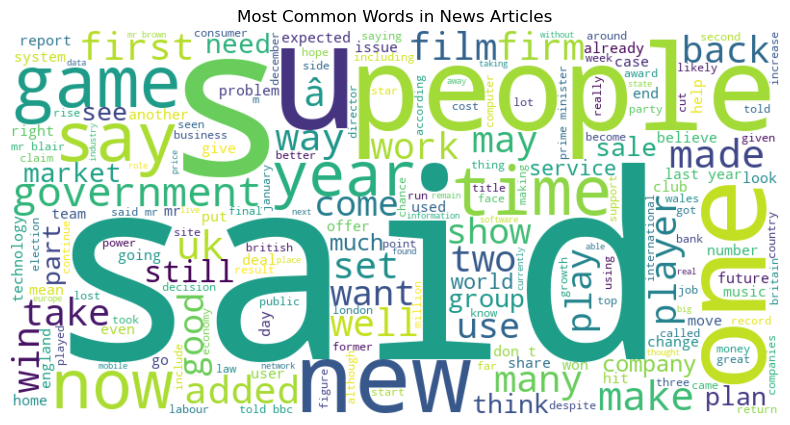

In [10]:
# 2. Most Common Words in Articles
# Goal: To display the most frequently used words in news articles.

from wordcloud import WordCloud

# Combine all text into one
all_text = " ".join(df["clean_text"])

# Generate Word Cloud
word_cloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in News Articles")


# Save the graph
word_cloud.to_file("Most Common Words.png")
plt.savefig("Most Common Words in News Articles2.png", dpi=300, bbox_inches="tight")
plt.show()

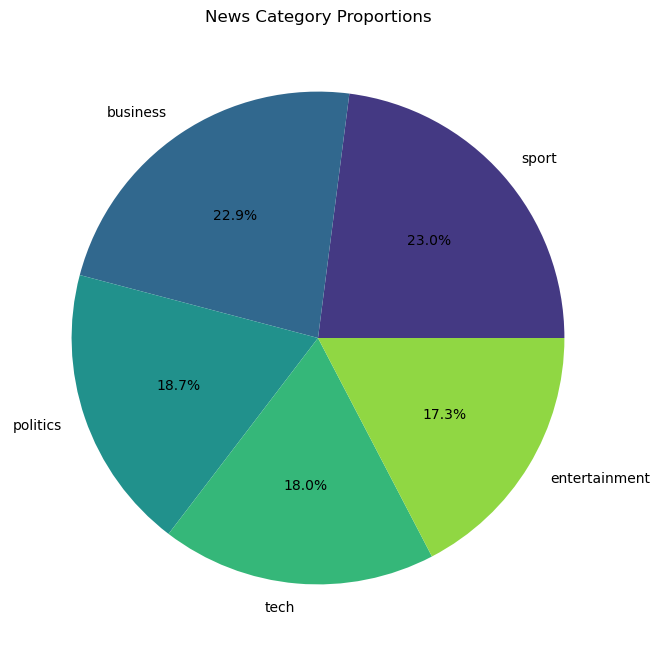

In [5]:
# 3. Percentage of News Categories
# Goal: To know the proportion of articles per category

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(category_counts)))
plt.title("News Category Proportions")

# Save the chart
plt.savefig("Pie Chart showing News Category Proportions.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_19764\3710029039.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="text_length", data=df, palette="coolwarm")


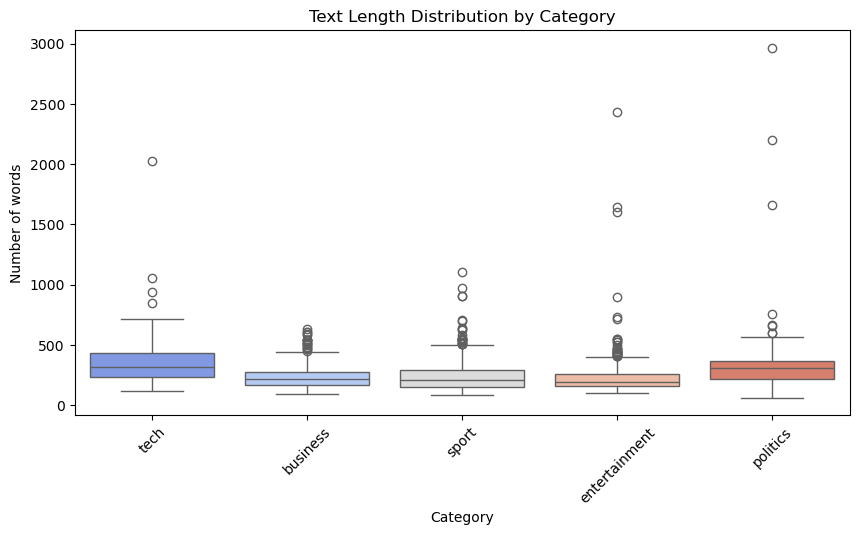

In [6]:
# 4. Length of Articles per Category
# Goal: To see which categories have longer or shorter articles

# Create a new column for article length
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))

# Plot a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x="category", y="text_length", data=df, palette="coolwarm")
plt.title("Text Length Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of words")
plt.xticks(rotation=45)

# Save the graph
plt.savefig("Boxplot showing the Distribution of Text Length by Category.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_19764\1320564130.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="Blues_r")


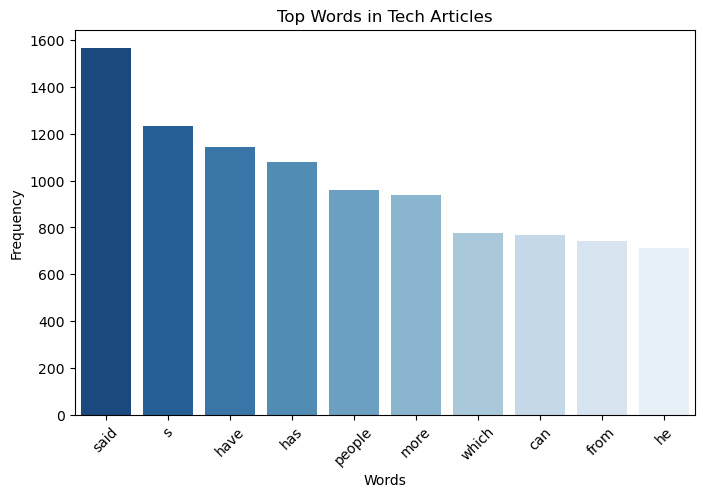

In [7]:
# 5a. Top Words per Category
# Goal: To see the most common words in tech

from collections import Counter

# Function to get top words per category
def get_top_words(category, n=10):
    words = " ".join(df[df["category"] == category]["clean_text"]).split()
    common_words = Counter(words).most_common(n)
    return dict(common_words)

# Select a category example (e.g., "tech")
category_name = "tech"
top_words = get_top_words(category_name)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="Blues_r")
plt.title(f"Top Words in {category_name.capitalize()} Articles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Save the chart
plt.savefig("Bar Chart showing the Top Words in Tech", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_19764\2295663554.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="flare")


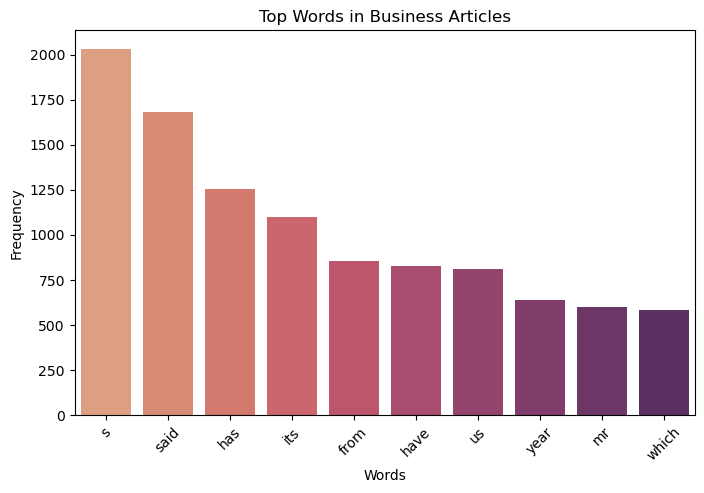

In [8]:
# 5b. Top Words per Category
# Goal: To see the most common words in business

from collections import Counter

# Function to get top words per category
def get_top_words(category, n=10):
    words = " ".join(df[df["category"] == category]["clean_text"]).split()
    common_words = Counter(words).most_common(n)
    return dict(common_words)

# Select a category example (e.g., "business")
category_name = "business"
top_words = get_top_words(category_name)

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="flare")
plt.title(f"Top Words in {category_name.capitalize()} Articles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Save the chart
plt.savefig("Bar Chart showing the Top Words in Business", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_19764\3688793771.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="light:b_r")


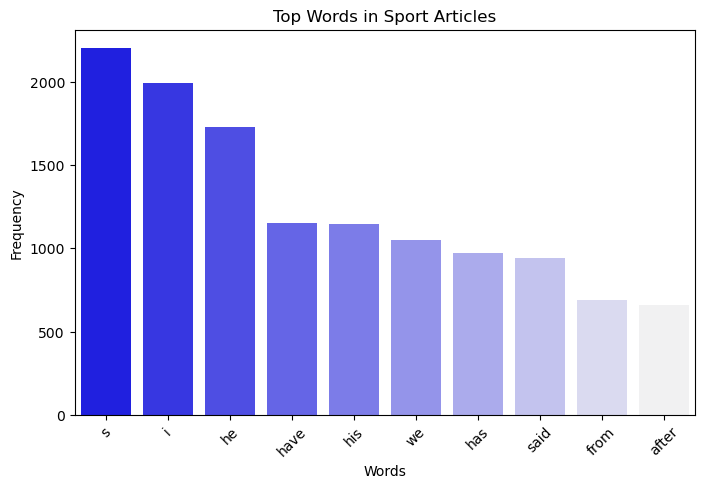

In [9]:
# 5c. Top Words per Category
# Goal: To see the most common words in sport

from collections import Counter

# Function to get top words per category
def get_top_words(category, n=10):
    words = " ".join(df[df["category"] == category]["clean_text"]).split()
    common_words = Counter(words).most_common(n)
    return dict(common_words)

# Select a category example (e.g., "sport")
category_name = "sport"
top_words = get_top_words(category_name)

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="light:b_r")
plt.title(f"Top Words in {category_name.capitalize()} Articles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Save the chart
plt.savefig("Bar Chart showing the Top Words in Sport", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_19764\3105051488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="YlOrBr_r")


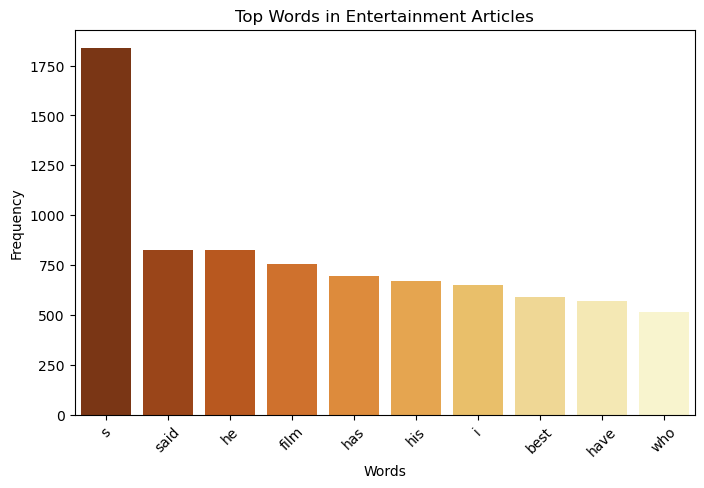

In [10]:
# 5d. Top Words per Category
# Goal: To see the most common words in entertainment

from collections import Counter

# Function to get top words per category
def get_top_words(category, n=10):
    words = " ".join(df[df["category"] == category]["clean_text"]).split()
    common_words = Counter(words).most_common(n)
    return dict(common_words)

# Select a category example (e.g., "entertainment")
category_name = "entertainment"
top_words = get_top_words(category_name)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="YlOrBr_r")
plt.title(f"Top Words in {category_name.capitalize()} Articles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Save the chart
plt.savefig("Bar Chart showing the Top Words in Entertainment", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_19764\1230319018.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="magma")


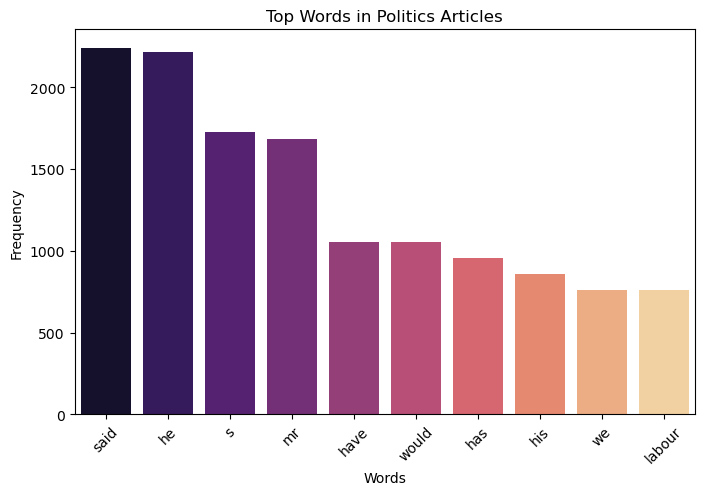

In [11]:
# 5e. Top Words per Category
# Goal: To see the most common words in politics

from collections import Counter

# Function to get top words per category
def get_top_words(category, n=10):
    words = " ".join(df[df["category"] == category]["clean_text"]).split()
    common_words = Counter(words).most_common(n)
    return dict(common_words)

# Select a category example (e.g., "politics")
category_name = "politics"
top_words = get_top_words(category_name)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette="magma")
plt.title(f"Top Words in {category_name.capitalize()} Articles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Save the chart
plt.savefig("Bar Chart showing the Top Words in Politics", dpi=300, bbox_inches="tight")
plt.show()

### Sentiment Analysis
##### I want to determine whether a news article has a positive, negative or neutral tone.

In [3]:
# install dependencies
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00


In [4]:
# Import dependencies
from textblob import TextBlob

In [12]:
# Define a function to get polarity
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment
df["Sentiment"] = df["clean_text"].apply(get_sentiment)

# Show results
print(df[["category", "clean_text", "Sentiment"]].head())

        category                                         clean_text Sentiment
0           tech  tv future hands viewers home theatre systems p...  Positive
1       business  worldcom boss left books alone former worldcom...  Negative
2          sport  tigers wary farrell gamble leicester say rushe...  Positive
3          sport  yeading face newcastle fa cup premiership side...  Negative
4  entertainment  ocean s twelve raids box office ocean s twelve...  Positive


### Convert Text to Numerical Features

##### This is because machine learning cannot process raw text, thus I have to convert it using TF-IDF (Term Frequency Inverse Document Frequency) matrix

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)       # Limit vocabulary size for efficiency
X = vectorizer.fit_transform(df["clean_text"])       # Transforms text into numerical features
y = df["category"]                                   # Target labels

### Split the data into training and testing sets

##### I will use 80% for training and 20% for testing



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the ML model

##### I will use Naive Bayes Classifier, as it is good for text classification



In [15]:
from sklearn.naive_bayes import MultinomialNB

#Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Make predictions and evaluate performance



In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Show classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 96.40%
               precision    recall  f1-score   support

     business       0.97      0.92      0.94       101
entertainment       1.00      0.93      0.96        81
     politics       0.90      0.99      0.94        83
        sport       0.99      1.00      0.99        98
         tech       0.96      0.99      0.98        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.97      0.96      0.96       445



### Test the Model with New Text

In [18]:
# Example new text
new_text = input(str("Kindly input your text here:" ))
new_text_clean = [preprocess_text(new_text[0])]      # Preprocess input

# Convert to TF-IDF features
new_text_vectorized = vectorizer.transform(new_text_clean)

## Predict categorry
predicted_category = model.predict(new_text_vectorized)
print(f"Predicted Category: {predicted_category[0]}")

Kindly input your text here: what is the Tecno C3 phone doing in the market?


Predicted Category: sport


### Deploying the model

##### I want to deploy the News Classification Model as an API using FastAPI and serve it with Uvicorn. This allows anyone to send text data to the API and receive a predicted category.

##### Installing dependencies

In [19]:
pip install fastapi uvicorn

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


### Save the trained model and vectorizer
##### I would need to save the trained model and vectorizer to be used on the the API.

In [19]:
import joblib

# Save the model
joblib.dump(model, "news_classifier.pkl")

# Save the vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

#### This would mark the end of this part of the project. I would need to create a new python file "app.py" for the API